In [4]:
pip install --user ydata-profiling


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 3.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.0 MB 2.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 2.4 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.0 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.0 MB 2.5 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 2.6 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.0 MB 2.7 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 2.7 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 2.8 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 2.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 2.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 2.9 MB/s eta 0:00:01
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [1]:
from ydata_profiling import ProfileReport


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline


In [3]:
df=pd.read_csv('./Mall_Customers.csv')


In [4]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop('CustomerID',inplace=True,axis=1)

In [8]:
df.columns=['Gender','Age','Annual_Income','Spending_Score(1-100)']

In [9]:
df.describe()

,Age,Annual_Income,Spending_Score(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
df.corr(numeric_only=True)


,Age,Annual_Income,Spending_Score(1-100)
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score(1-100),-0.327227,0.009903,1.000000


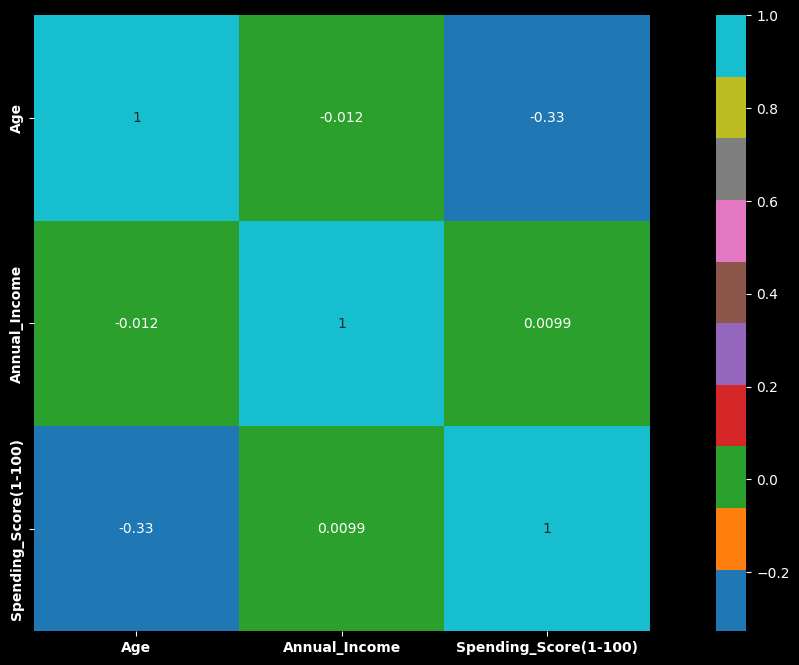

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, square=True, cmap='tab10')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


<Figure size 1500x1000 with 0 Axes>

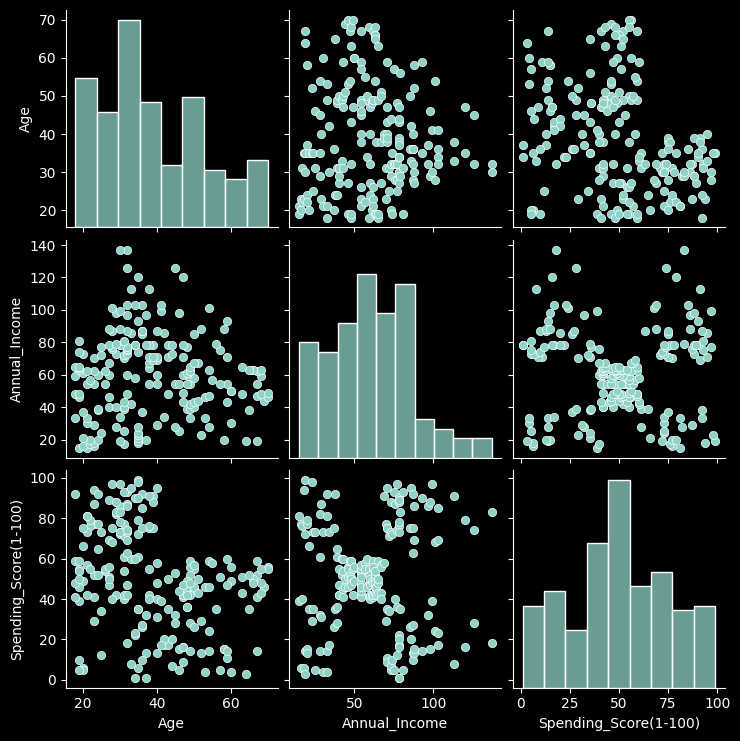

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.pairplot(df)

<Axes: >

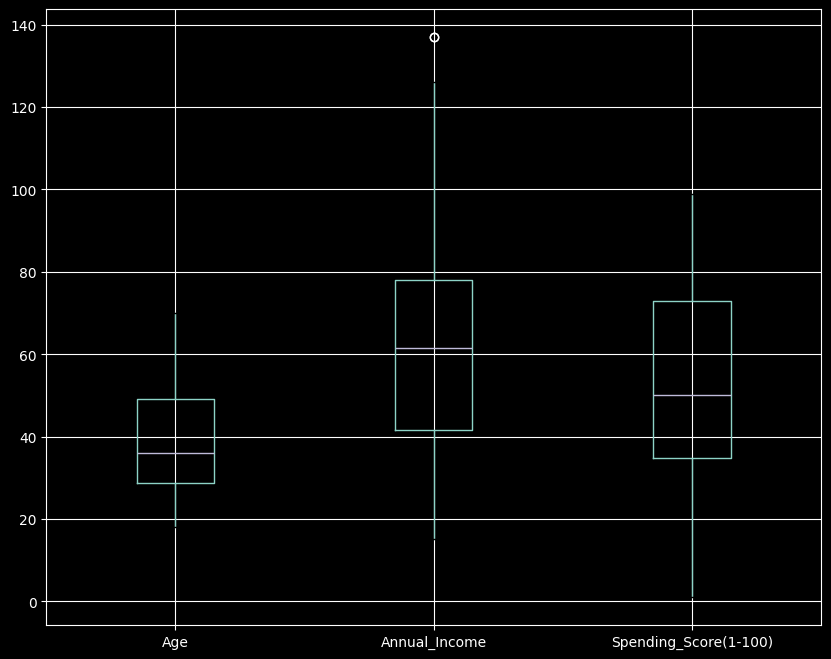

In [15]:
plt.figure(figsize=(10,8))
df.boxplot()

<Axes: ylabel='Density'>

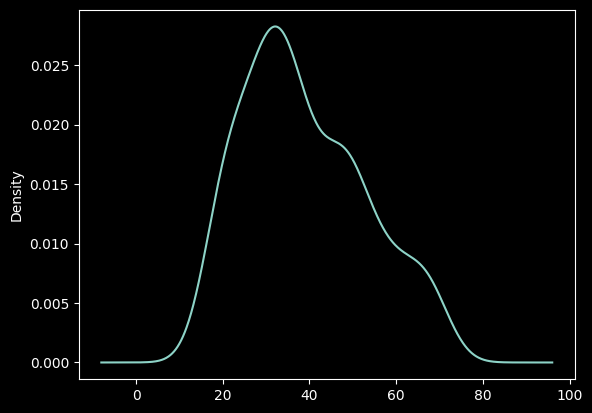

In [16]:
df['Age'].plot.kde()


<Axes: ylabel='Density'>

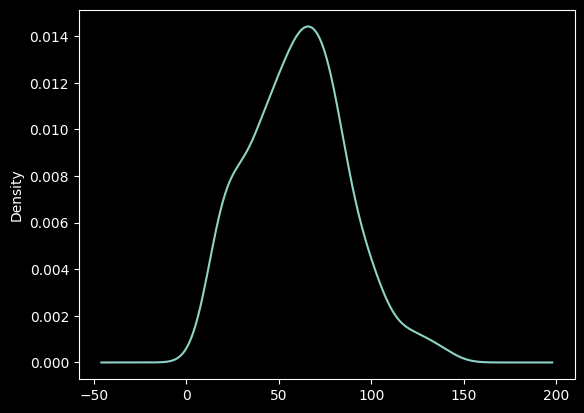

In [17]:
df['Annual_Income'].plot.kde()

<Axes: ylabel='Density'>

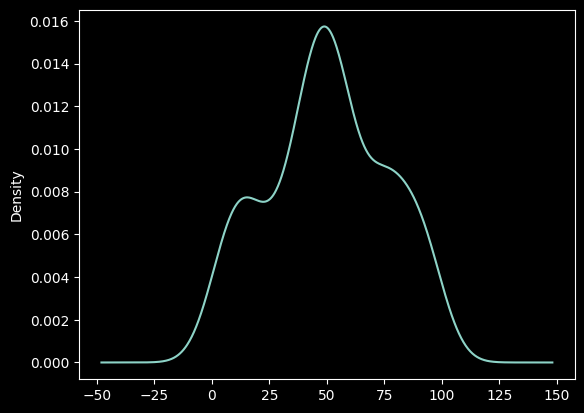

In [18]:
df['Spending_Score(1-100)'].plot.kde()

<Axes: xlabel='Gender', ylabel='Annual_Income'>

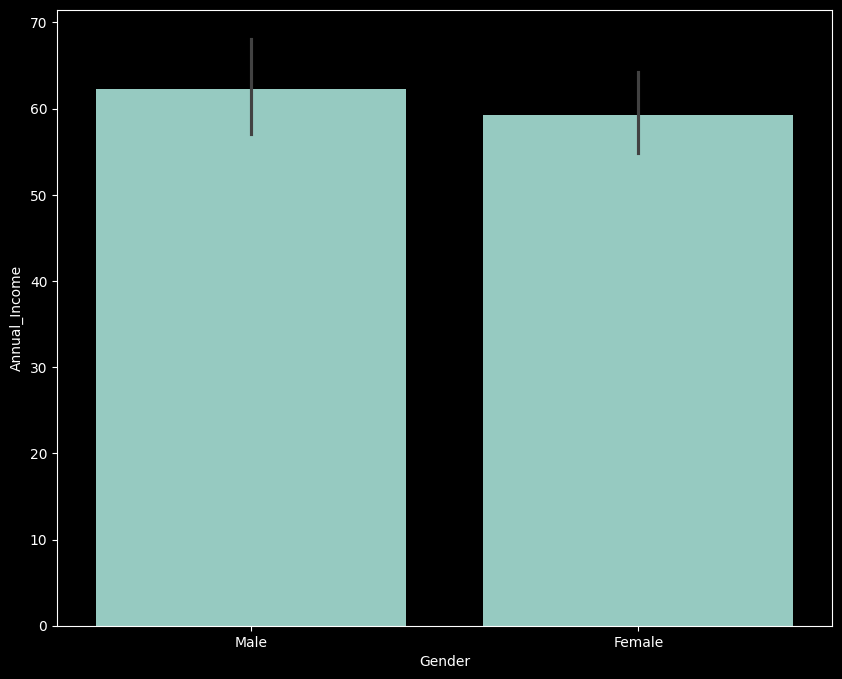

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender',y='Annual_Income',data=df)

<Axes: xlabel='Age', ylabel='Annual_Income'>

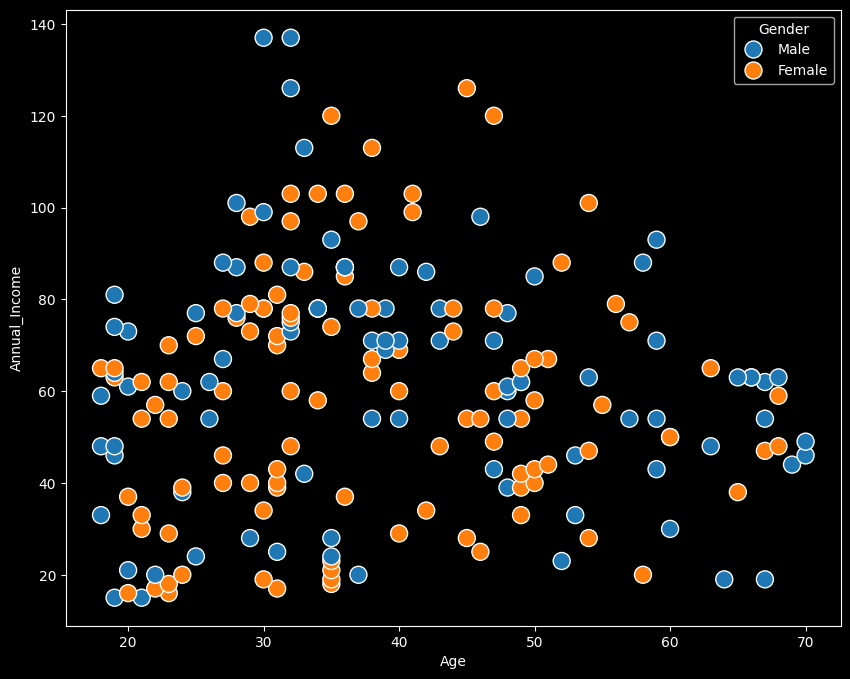

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Annual_Income',hue='Gender',data=df,s=150,palette='tab10')

<Axes: xlabel='Spending_Score(1-100)', ylabel='Annual_Income'>

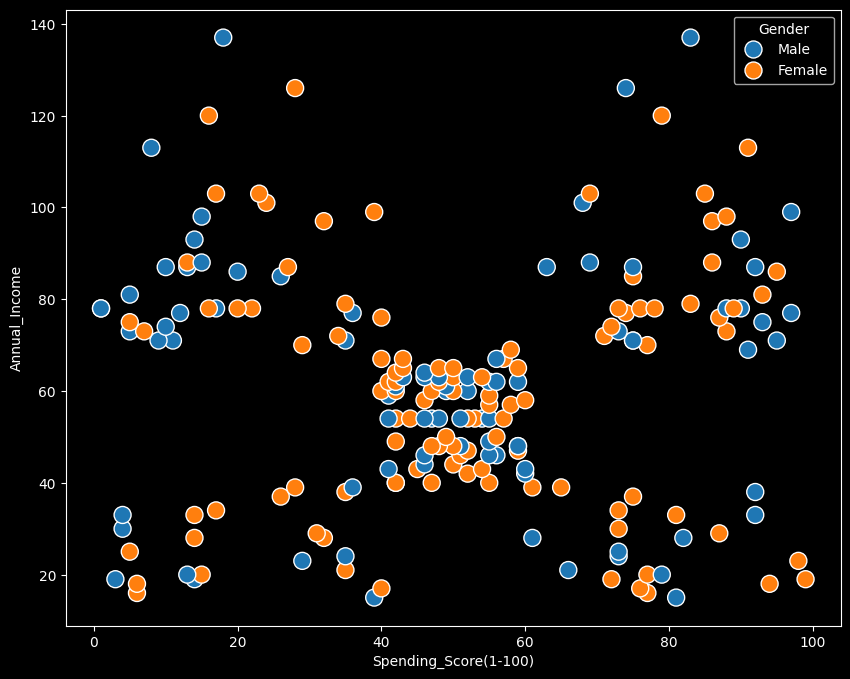

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Spending_Score(1-100)',y='Annual_Income',hue='Gender',data=df,s=150,palette='tab10')

In [22]:
report=ProfileReport(df)
report.to_file('Mall_Customers_Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 8359.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\kulka\AppData\Roaming\Python\Python313\site-packages\ydata_profiling\profile_report.py:386: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
encoder=LabelBinarizer()
df['Gender']=encoder.fit_transform(df['Gender'])


In [24]:
skew(df)

array([ 0.24174689,  0.48191947,  0.31942368, -0.04686531])

In [25]:
kurtosis(df)

array([-1.94155844, -0.68475139, -0.12589283, -0.83595827])

In [26]:
#Plot Elbow Method For Choosing Value Of K
cluster_no=[i for i in range(1,12)]
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(df)
    WCSS.append(cluster.inertia_)

Text(0, 0.5, 'WCSS')

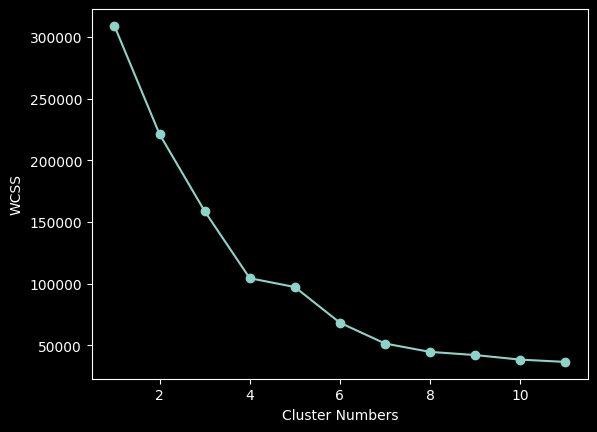

In [27]:
plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')

In [28]:
#k-means model
cluster=KMeans(init='k-means++',n_clusters=4,random_state=42)
df['Cluster_No']=cluster.fit_predict(df)

In [29]:
cluster.cluster_centers_

array([[ 0.37894737, 44.89473684, 48.70526316, 42.63157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.5       , 24.82142857, 28.71428571, 74.25      ],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895]])

In [30]:
df

,Gender,Age,Annual_Income,Spending_Score(1-100),Cluster_No
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


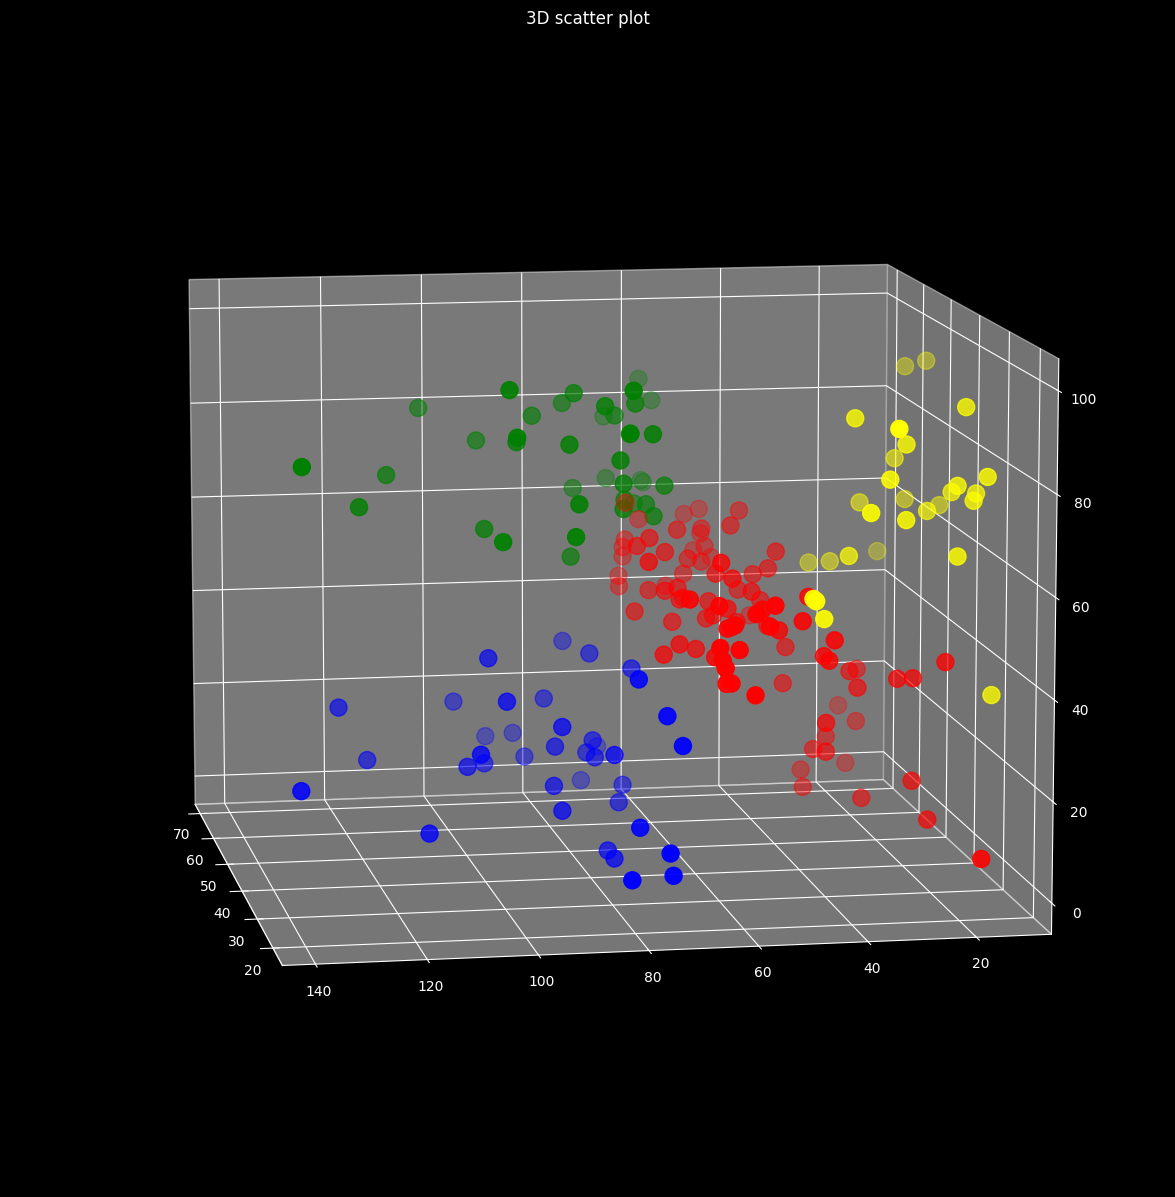

In [31]:
# Creating figure
plt.style.use('dark_background')
fig = plt.figure(figsize = (20, 15))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df['Age'][df['Cluster_No']==0], df['Annual_Income'][df['Cluster_No']==0], df['Spending_Score(1-100)'][df['Cluster_No']==0], c = "red", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==1], df['Annual_Income'][df['Cluster_No']==1], df['Spending_Score(1-100)'][df['Cluster_No']==1], c = "green", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==2], df['Annual_Income'][df['Cluster_No']==2], df['Spending_Score(1-100)'][df['Cluster_No']==2], c = "yellow", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==3], df['Annual_Income'][df['Cluster_No']==3], df['Spending_Score(1-100)'][df['Cluster_No']==3], c = "blue", s=150)
ax.view_init(10, 170)
plt.title("3D scatter plot")
plt.show()

In [33]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].mean()


,Age,Annual_Income,Spending_Score(1-100)
Cluster_No,,,
0,44.894737,48.705263,42.631579
1,32.692308,86.538462,82.128205
2,24.821429,28.714286,74.250000
3,40.394737,87.000000,18.631579


In [35]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].min()


,Age,Annual_Income,Spending_Score(1-100)
Cluster_No,,,
0,18,16,3
1,27,69,63
2,18,15,39
3,19,70,1


In [36]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].max()


,Age,Annual_Income,Spending_Score(1-100)
Cluster_No,,,
0,70,69,60
1,40,137,97
2,35,48,99
3,59,137,40


In [38]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].std()


,Age,Annual_Income,Spending_Score(1-100)
Cluster_No,,,
0,15.341831,14.522817,14.713616
1,3.728650,16.312485,9.364489
2,5.571446,10.384665,14.075524
3,11.376931,16.271348,10.915947
